In [1]:
import pandas as pd
import os as os
import numpy as np
import matplotlib.pyplot as plt
from ggplot import *
import json
from io import StringIO

from collections import OrderedDict
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource, gridplot , output_file
from bokeh.models import HoverTool 
from bokeh.io import vform
from bokeh.palettes import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  

os.chdir('c://users/grlurton/Google Drive/elections_niger')

In [3]:
## Données électeurs
store_electeurs = pd.HDFStore('data/full_data.h5')
data_electeurs = store_electeurs['complete_data']
store_electeurs.close()

## Données carto
with open('data/dept_map.json') as json_data:
    carto_dept = json.load(json_data)
    json_data.close()
    
with open('data/reg_map.json') as json_data:
    carto_reg = json.load(json_data)
    json_data.close()
    
    
## Données contextuelles
liste_depts = pd.read_csv('data/Niger_Departements.csv', encoding = "ISO-8859-1")

## Liste des départements corrigée
liste_depts[liste_depts['NOM_DEPART'] == 'BALLEYARA'] = 'TAGAZAR'
liste_depts.loc[liste_depts['NOM_DEPART'] == 'TAGAZAR' , 'ID_DEPART'] = 'None'

In [4]:
## Dropping duplicate electors (not sure where they come from, probably because multiple tries at extraction)
## data_electeurs = data_electeurs.drop_duplicates()

In [22]:
data_electeurs['age_rond'] = round(data_electeurs.age)
data_adultes = data_electeurs[(data_electeurs['age_rond']) > 18.0 & (data_electeurs['age_rond'] <= 100)]

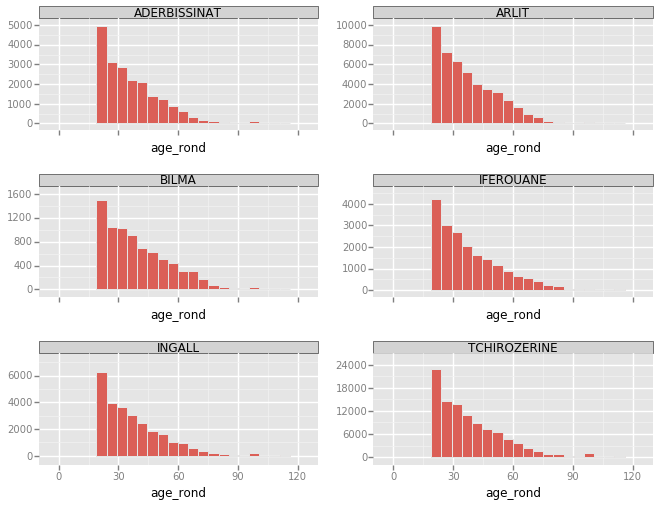

<ggplot: (-9223371970348587204)>


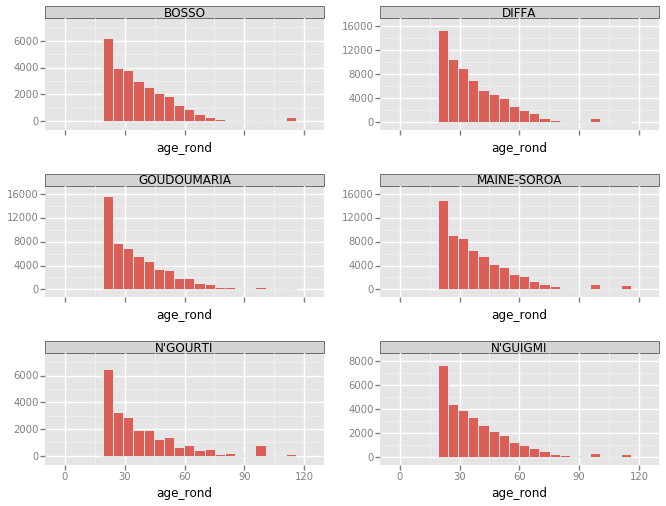

<ggplot: (-9223371970370470719)>


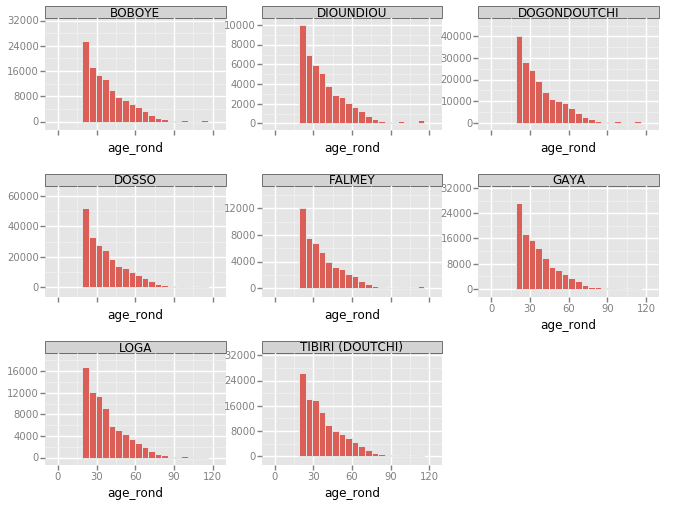

<ggplot: (-9223371969636797815)>


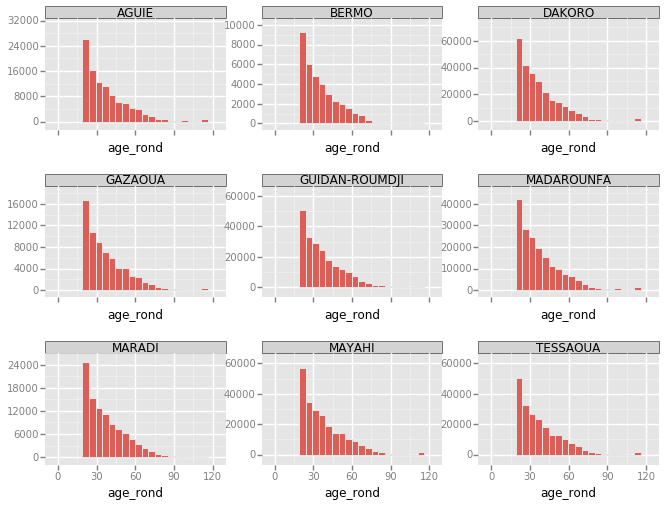

<ggplot: (66789552711)>


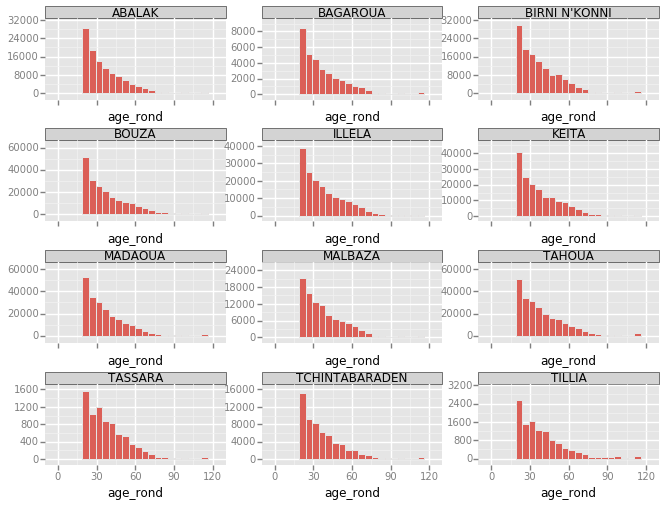

<ggplot: (66567345721)>


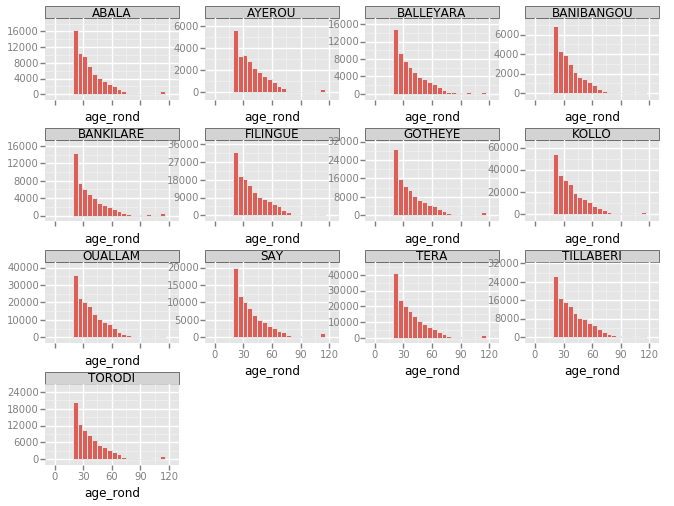

<ggplot: (66566838536)>


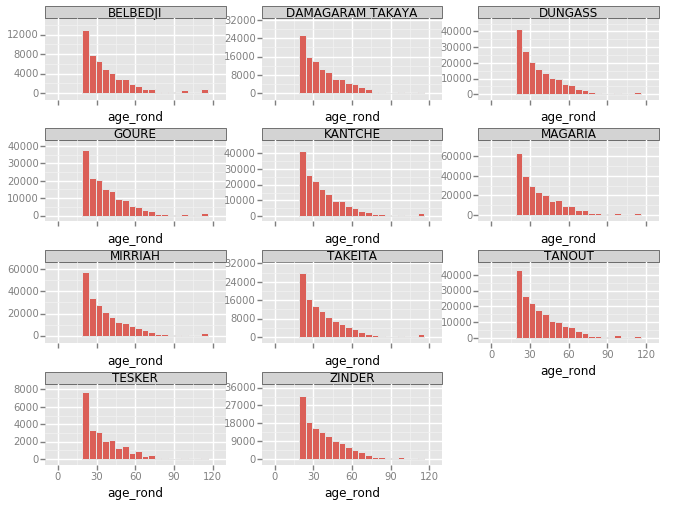

<ggplot: (-9223371969637340840)>


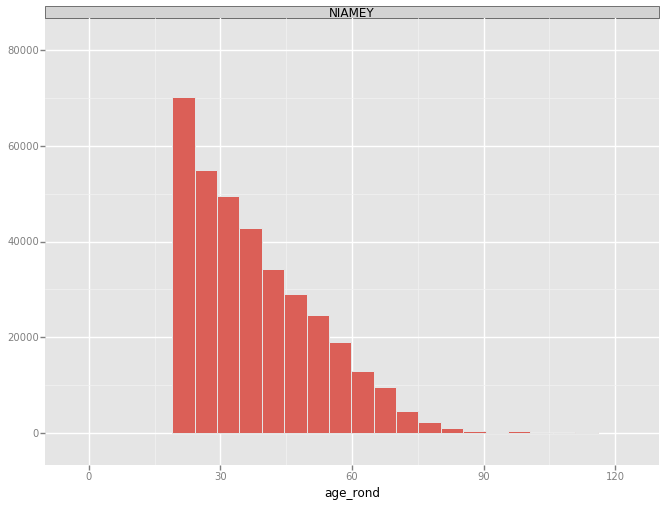

<ggplot: (67219499240)>


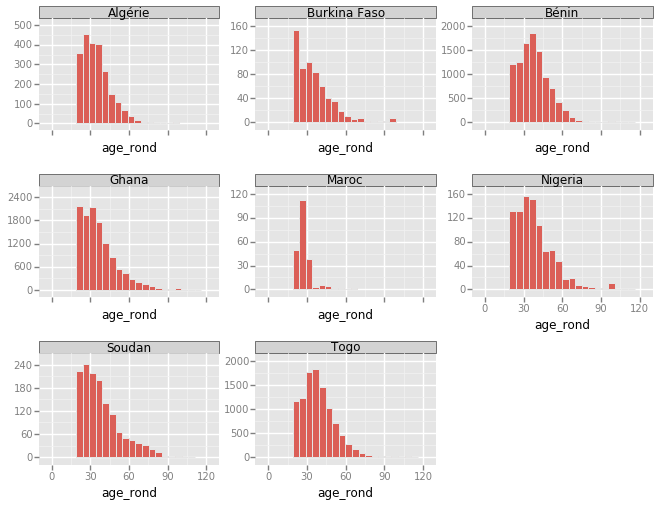

<ggplot: (66945140351)>


In [56]:
for reg in data_electeurs['NOM_REGION'].unique() :
    dat = data_adultes[data_adultes['NOM_REGION'] == reg]
    u = ggplot(aes(x = 'age_rond' , fill = 'NOM_REGION') , data = dat ) + geom_bar(binwidth = 5) + \
    facet_wrap('NOM_DEPART' , scales='free_y')
    print(u)


In [57]:
pop_departement = {'Aderbissinat':35320 , 'Arlit':105025 , 'Bilma':17935 , 'Iferouane':37231 ,  'Ingall':51903  ,
                  'Tchirozerine':244706 , 'Bosso':76735 , 'Diffa':159722 , 'Goudoumaria':100559 , 'Maine-Soroa':131664 , 
                  "N'Gourti":51767 , "N'Guigmi":73374 , 'Boboye':252597 , 'Dioundiou':109615 , 'Dogondoutchi':372473 ,
                  'Dosso':492560 , "Falmey":103271 ,'Gaya':261638 , 'Loga':175543 , 'Tibiri':270016 , 
                  'Aguie':245996 , 'Bermo':52274 , 'Dakoro':630421 , 'Gazaoua':160536 , 'Guidan-Roumji':523717 , 
                   'Madarounfa':448863 , 'Mayahi':557186 , 'Tessaoua':515852 , 'Abalak':256301 , 'Bagaroua':72293 ,  
                  "Birni N'Konni":12886 , 'Bouza':445363 , 'Illela':335785 , 'Keita':337098 , 'Madaoua':545538 , 'Malbaza':232407 , 
                  'Tahoua':432659 , 'Tassara':24457 , 'Tchintabaraden':145086 , 'Tillia':38994 ,'Abala':144287 , 
                   'Ayerou':47030 , 'Balleyara':107134 , 'Banibangou':66949 , 'Bankilare':84893 , 'Filingue':306726 , 
                  'Gotheye':241043 , 'Kollo':465399 , 'Ouallam':327224 , 'Say':175625 , 'Tera':336207 , 'Tillaberi':227352 ,
                   'Torodi':182613 , 'Belbedji':96452 , 'Damagaram Takaya':241169 , 'Dungass':353867 , 'Goure':327818 , 
                   'Kantche':399181 , 'Magaria':577743 , 'Mirriah':507499 , 'Takeita':246818 , 'Tanout':429150 , 
                   'Tesker':37132 , 'Maradi':267249 , 'Tahoua':149498 , 'Zinder':322935 , 'Niamey':1026848}

In [59]:
dep_d = pop_departement.keys()
dep = []
pop_census = []
inscrits = []
for i in dep_d :
    dep = dep + [i]
    pop_census = pop_census + [pop_departement[i]]
    inscrits = inscrits + [len(data_electeurs[data_electeurs['NOM_DEPART'].str.lower() == i.lower()])]
    
census_comparaison = pd.DataFrame({'Departement':dep , 
                               'Population recensée':pop_census ,
                               'Nbre inscrits' : inscrits})
census_comparaison["Proportion d'inscrits"] = census_comparaison['Nbre inscrits'] / census_comparaison['Population recensées']

In [62]:
census_comparaison[0:60]

,Departement,Nbre inscrits,Population recensées,Proportion d'inscrits
0,Falmey,49450,103271,0.478837
1,Dosso,217458,492560,0.441485
2,Torodi,80616,182613,0.441458
3,Bilma,7795,17935,0.434625
4,Tassara,7761,24457,0.317332
5,Dakoro,263149,630421,0.417418
6,Boboye,116108,252597,0.459657
7,Dogondoutchi,178262,372473,0.478590
8,Gazaoua,67973,160536,0.423413
9,Bouza,200601,445363,0.450421
